# Hotel Booking Cancellation Prediction - EDA
**Objective:** Predict hotel booking for a next booking of the hotel.

## Importing the libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the data

In [15]:
df = pd.read_csv('/home/diwas/Documents/DevStuff/Hotel Booking Cancellation/data/raw/hotel_booking.csv')

## Data Exploration

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [17]:
# Descriptive Statistics
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
# Checking for missing valeues
null_values = df.isnull().sum()
null_values[null_values > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [19]:
# Checking for duplicated values
df.duplicated().sum()

0

## Analyzing Numerical Variables

<Axes: xlabel='is_canceled', ylabel='count'>

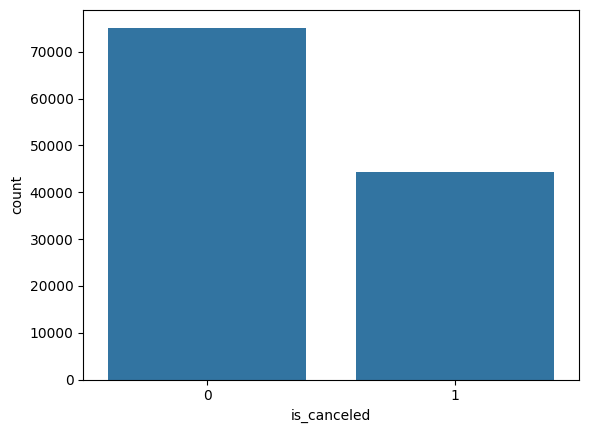

In [20]:
sns.countplot(data = df, x = 'is_canceled')

### Analyzing Numerical Variables

### Lead time Analysis

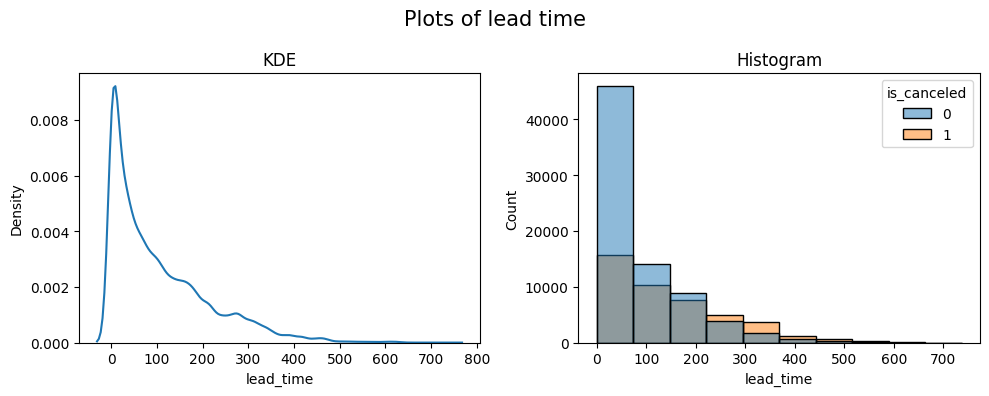

In [60]:
# Leadtime analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Plots of lead time', fontsize=15)
# KDE plot
sns.kdeplot(data=df, x='lead_time', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='lead_time', bins=10, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations** 
* Bookings with high lead_time(days between arrival and booking) is more likely to be cancelled.
* Positively skewed data.

### Analysis of stays_in_weekend_nights/ stays_in_week_nights

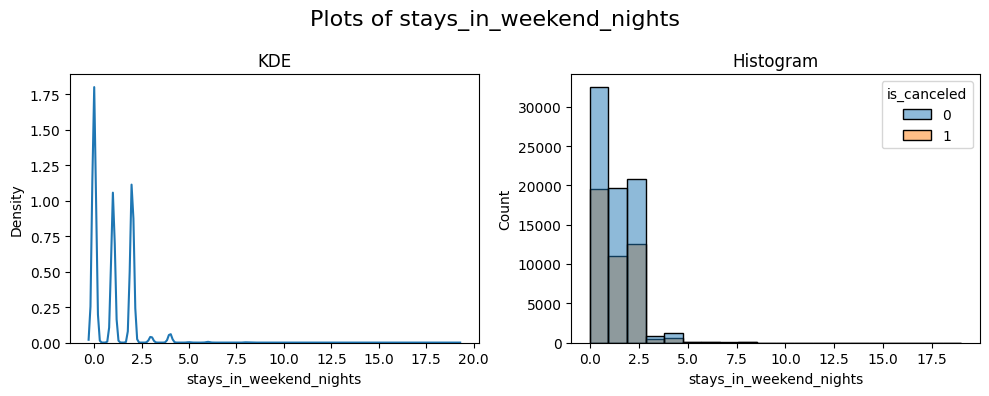

In [22]:
# Making plots of stays in weekend nights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Plots of stays_in_weekend_nights', fontsize=16)
# KDE plot
sns.kdeplot(data=df, x='stays_in_weekend_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='stays_in_weekend_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

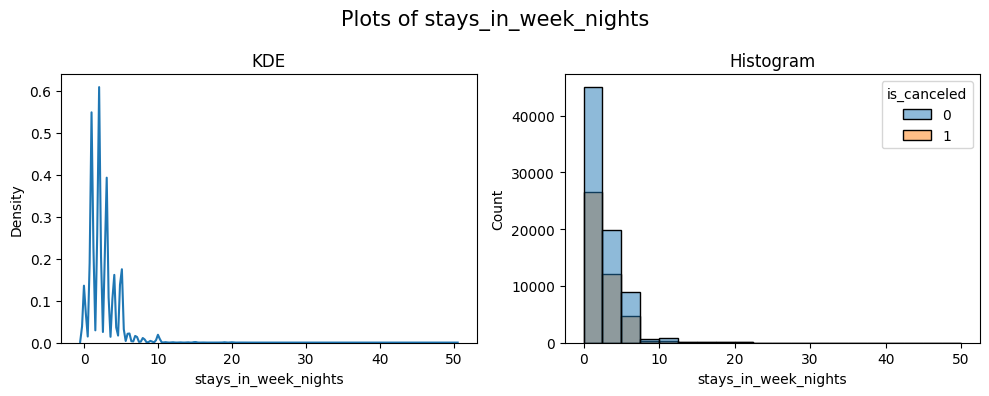

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of stays_in_week_nights', fontsize=15)
# KDE plot
sns.kdeplot(data=df, x='stays_in_week_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='stays_in_week_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

In [62]:
# Creating new feature total nights stayed
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

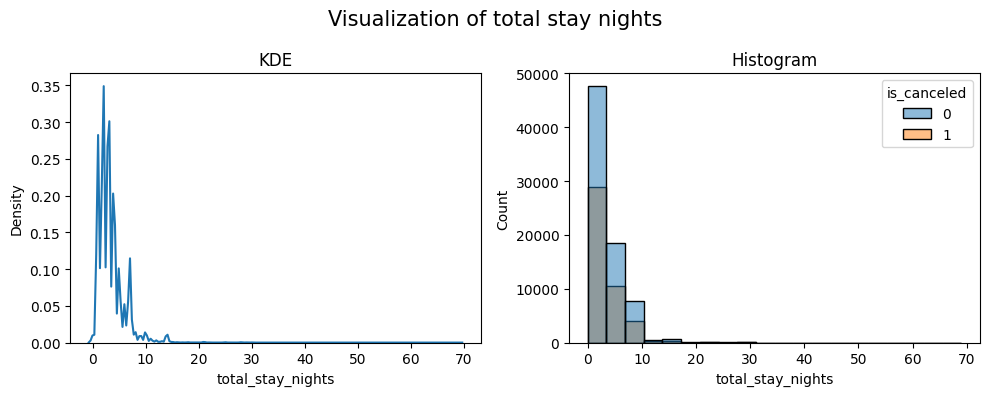

In [64]:
# Visualizing total_members
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total stay nights', fontsize=15)
# KDE plot
sns.kdeplot(data=df, x='total_stay_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='total_stay_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations** 
* No such remarkable effect of stays_in_week/weekend_nights variable on cancellation.
* Both stays_in_week/weekend_nights are positively skewed.
* Presense of outliers.

### Analysis of no. of members babies, adults, children

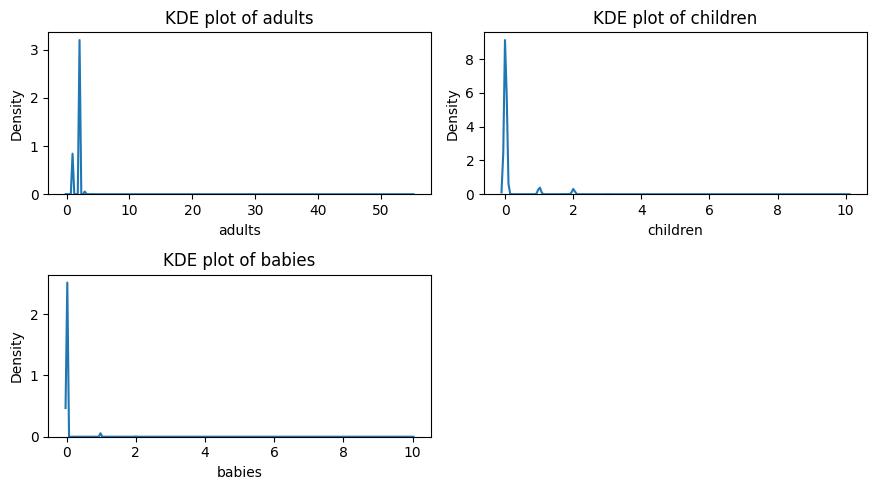

In [27]:
# Explore distributions of these variable
cols_to_plot = ['adults', 'children', 'babies']

# Create subplots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.kdeplot(df[feature])
    plt.title(f'KDE plot of {feature}')

plt.tight_layout()

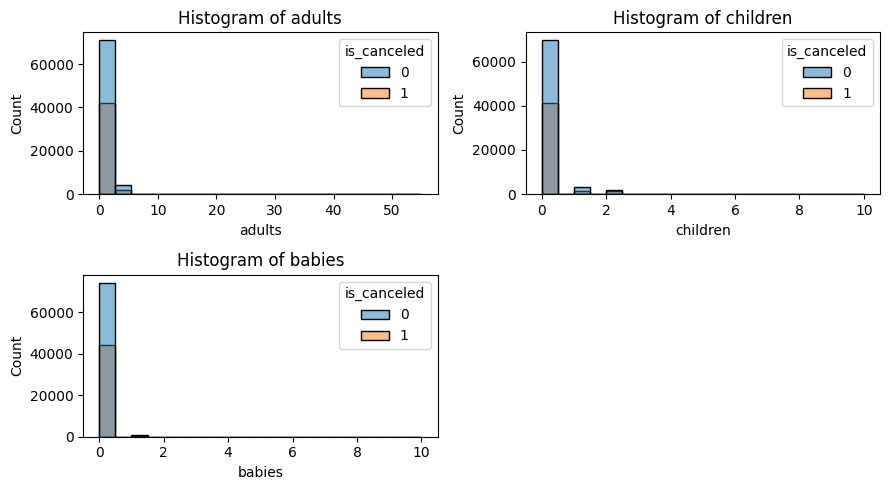

In [29]:
# Create subplots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.histplot(data = df, x = feature, bins = 20, hue = 'is_canceled')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()

In [31]:
# Creating a new feature total members
df['total_members'] = df['adults'] + df['children'] + df['babies']

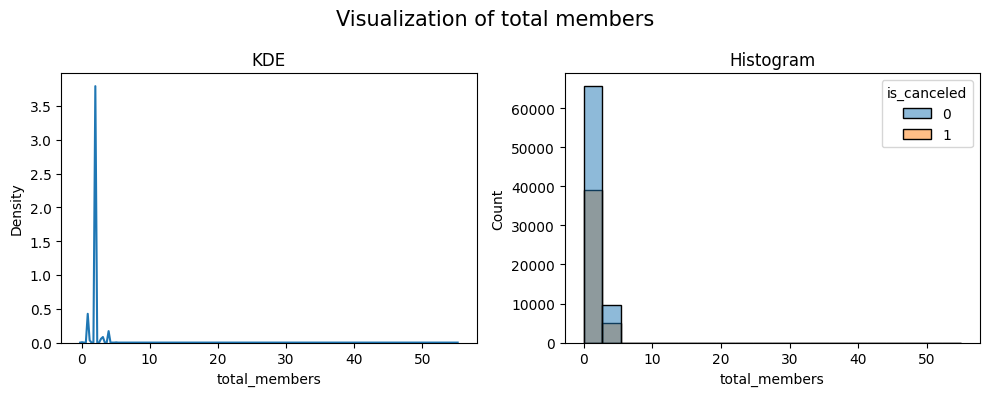

In [32]:
# Visualizing total_members
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total members', fontsize=15)
# KDE plot
sns.kdeplot(data=df, x='total_members', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='total_members', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* All of the variables denoting members are positively skewed.
* Presense of outliers can be seen.

### Impact of Previous cancellations.

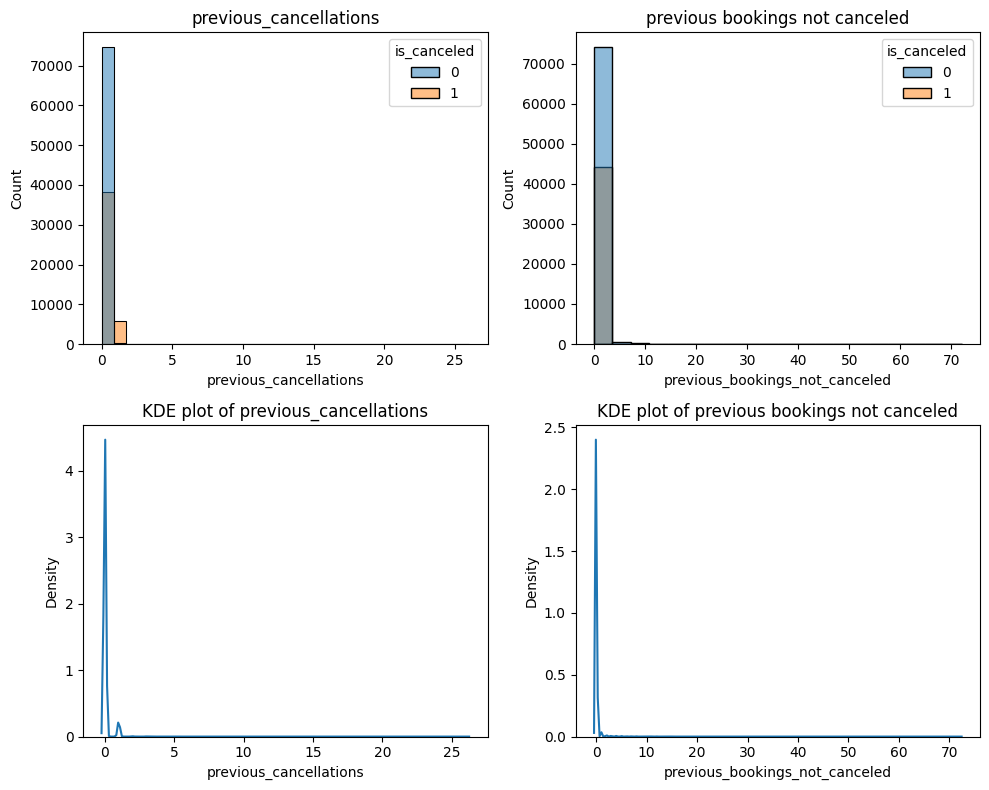

In [55]:
# Visualizing previous cancellation and not previous cancellations 
# Assuming 'is_canceled' is a categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Creating histograms with hue
sns.histplot(data=df, x='previous_cancellations', ax=axes[0, 0], bins=30, hue='is_canceled')
axes[0, 0].set_title('previous_cancellations')

sns.histplot(data=df, x='previous_bookings_not_canceled', bins=20, ax=axes[0, 1], hue='is_canceled')
axes[0, 1].set_title('previous bookings not canceled')

# Creating kdeplots
sns.kdeplot(data=df, x='previous_cancellations', ax=axes[1, 0])
axes[1, 0].set_title('KDE plot of previous_cancellations')

sns.kdeplot(data=df, x='previous_bookings_not_canceled', ax=axes[1, 1])
axes[1, 1].set_title('KDE plot of previous bookings not canceled')

# Adjust layout
plt.tight_layout()


In [46]:
# Creating a new feature total bookings
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

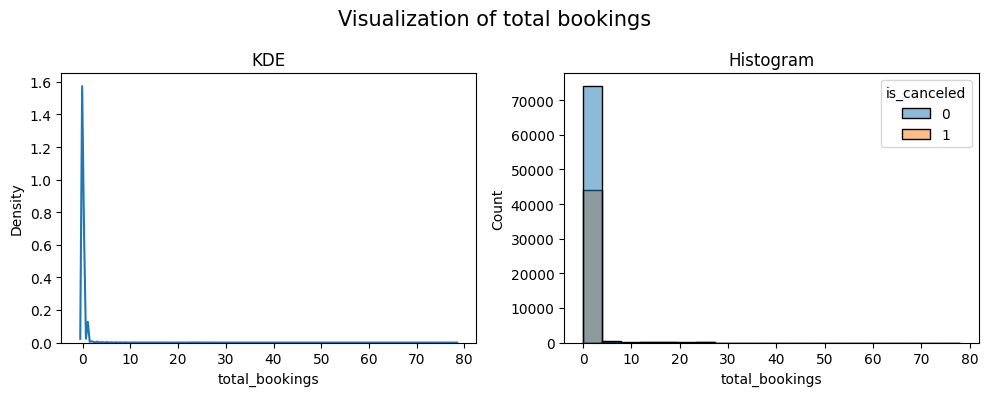

In [56]:
# Creating plots of total bookings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total bookings', fontsize=15)
# KDE plot
sns.kdeplot(data=df, x='total_bookings', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='total_bookings', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* Person with high number of previous cancellations are more likely to cancel the booking.
* Skewed distribution of previous_cancellation/ total_cancellation.

### What if customer makes changes in booking ?

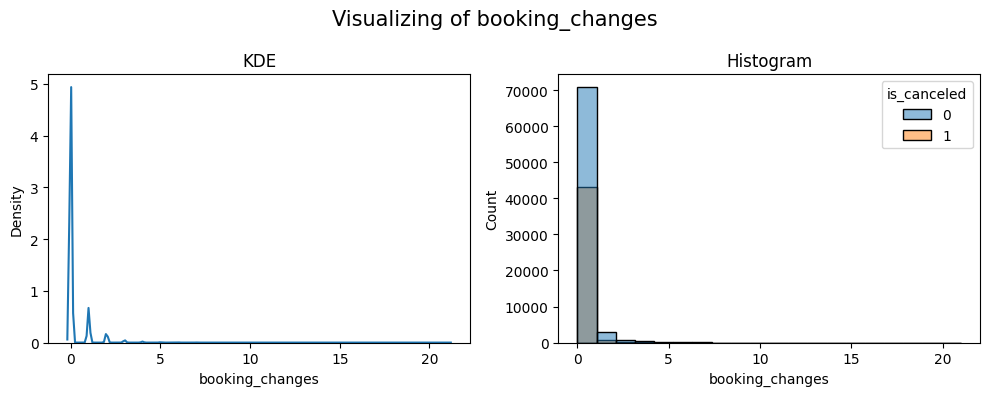

In [61]:
## Creating plots of total bookings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.suptitle('Visualizing of booking_changes', fontsize=15)
# KDE plot
sns.kdeplot(data=df, x='booking_changes', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=df, x='booking_changes', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* Positive skewed data.

### Other Variables

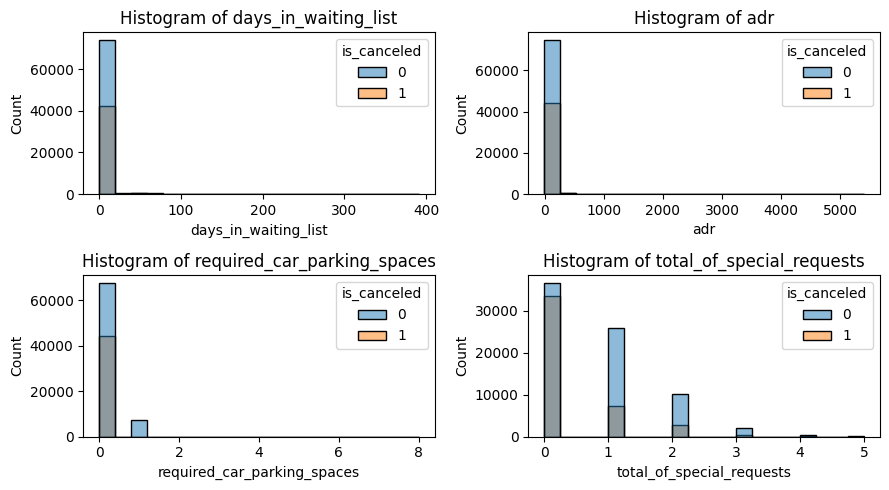

In [81]:
# Explore numerical features
cols_to_plot = ['days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.histplot(data = df, x = feature, bins = 20, hue = 'is_canceled')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()

**Insights**
- Less risk of cancel if total_of_special_requests are higher .
- Those who require car paking spaces also has less cancel rates.

## Analyze Categorical Variables

In [85]:
categorical_features = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
print(len(categorical_features) + len(numerical_features))

24
